In [ ]:
!pip install pandas
!pip install matplotlib
!pip install surprise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('../raw/users-score-2023.csv')

In [3]:
data.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [4]:
data.describe()

,user_id,anime_id,rating
count,2.432519e+07,2.432519e+07,2.432519e+07
mean,4.403843e+05,9.754686e+03,7.622930e+00
std,3.669469e+05,1.206196e+04,1.661510e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.718800e+04,8.730000e+02,7.000000e+00
50%,3.879780e+05,4.726000e+03,8.000000e+00
75%,5.280430e+05,1.316100e+04,9.000000e+00
max,1.291097e+06,5.608500e+04,1.000000e+01


Text(0.5, 1.0, 'Ratings Distribution (Sorted)')

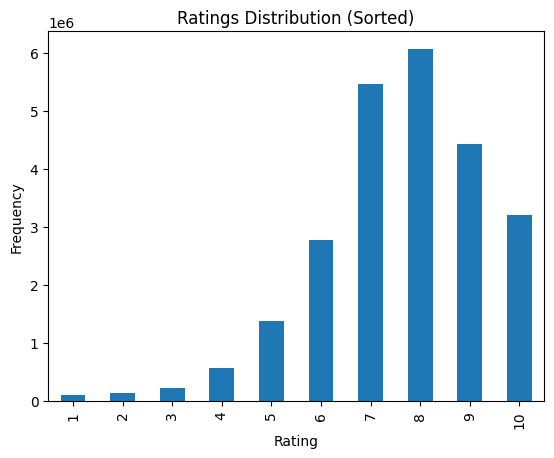

In [5]:
ratings = data['rating'].value_counts().sort_index().plot(kind='bar')

ratings.set_xlabel('Rating')
ratings.set_ylabel('Frequency')
ratings.set_title('Ratings Distribution (Sorted)')

In [6]:
user_interactions = data.groupby('user_id').size()
print(user_interactions.describe())

count    270033.000000
mean         90.082290
std         143.061117
min           1.000000
25%           8.000000
50%          36.000000
75%         122.000000
max        2986.000000
dtype: float64


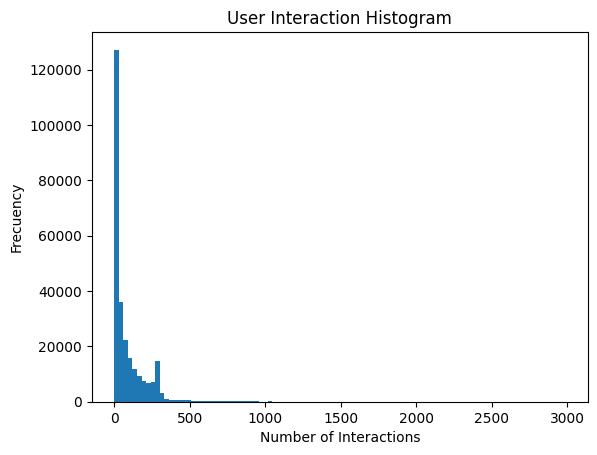

In [7]:
plt.hist(user_interactions, bins=100)
plt.xlabel('Number of Interactions')
plt.ylabel('Frecuency')
plt.title('User Interaction Histogram')
plt.show()

In [8]:
anime_interactions = data.groupby('anime_id').size()
anime_interactions.describe()

count     16500.000000
mean       1474.254000
std        5009.939366
min           1.000000
25%           8.000000
50%          83.000000
75%         682.000000
max      126492.000000
dtype: float64

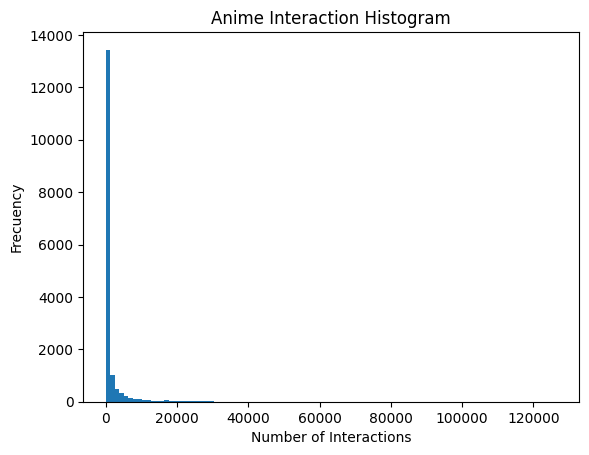

In [9]:
plt.hist(anime_interactions, bins=100)
plt.xlabel('Number of Interactions')
plt.ylabel('Frecuency')
plt.title('Anime Interaction Histogram')
plt.show()


<Axes: >

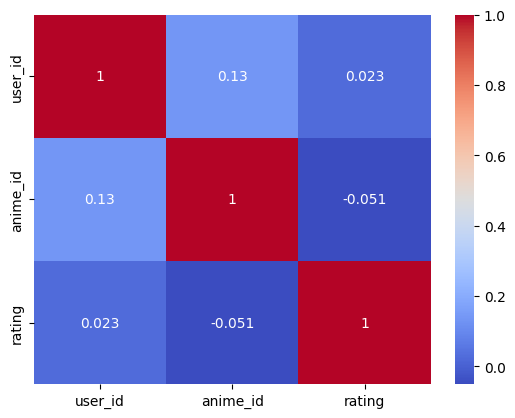

In [10]:
import seaborn as sns
correlation_matrix = data[['user_id', 'anime_id', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [11]:
!pip3 install surprise


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [4]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

reader = Reader(rating_scale=(1, 10))
data_surp = Dataset.load_from_df(data[0:1000000][['user_id', 'anime_id', 'rating']], reader)

trainset, testset = train_test_split(data_surp, test_size=0.2)

model = SVD()
model.fit(trainset)
predictions = model.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.2847
MAE:  0.9667


0.9667116521201045